In [74]:
import tensorflow as tf
import os

def get_section_results(file, avret='Eval_AverageReturn', 
                        stdret='Eval_StdReturn'):
    
    ff = os.listdir(file)
    for fff in ff: 
        if 'events' in fff:
            print('using file', os.path.join(file, fff))
            print('file', file)
            fp_init = file
            fp_final = fp_init.split('/data/')[0] + '/data/logs/' 
            print('fp final', fp_final)
            !echo $fp_init
            !echo $fp_final
#             !cp -a $fp_init $fp_final
            eval_returns = []
            eval_std = []
            for e in tf.compat.v1.train.summary_iterator(os.path.join(file, fff)):
              
                for v in e.summary.value:
                    if v.tag == avret:
                        eval_returns.append(v.simple_value)
                    elif v.tag == stdret: 
                        eval_std.append(v.simple_value)
            return eval_returns, eval_std
        
    assert False
    
    
import tensorflow as tf
import os

def get_section_results_atari(file, avret='Eval_AverageReturn', 
                        stdret='Train_EnvstepsSoFar'):
    
    ff = os.listdir(file)
    for fff in ff: 
        if 'events' in fff:
            print('using file', os.path.join(file, fff))
            eval_returns = []
            eval_std = []
            
            fp_init = file
            fp_final = fp_init.split('/data/')[0] + '/data/logs/' 
            print('fp final', fp_final)
            !echo $fp_init
            !echo $fp_final
#             !mkdir $fp_final
#             !cp -a $fp_init $fp_final
            for e in tf.compat.v1.train.summary_iterator(os.path.join(file, fff)):
              
                for v in e.summary.value:
#                     print(v)
                    if v.tag == avret:
                        eval_returns.append(v.simple_value)
                    elif v.tag == stdret: 
                        eval_std.append(v.simple_value)
            return eval_std, eval_returns
        
    assert False

In [75]:
data_dir = '/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/'
import numpy as np
exps = {}
for runs in os.listdir(data_dir): 
    # go through each run, get the latest one (assume thats the goat)
    exp_name = runs.split('-')[0]
    from datetime import datetime as dt
    try:
        datestr = runs.split('-')[1:]
        datestr = ('_').join(datestr)[3:]
        a = dt.strptime(datestr, "%d_%m_%Y_%H_%M_%S")
    #     if 'q3' in runs: 
    #         print(runs)
        if not exp_name in exps: 
            exps[exp_name] = (runs, a)
        else: 
            date_old = exps[exp_name][1]
            if a > date_old: 
                exps[exp_name] = (runs, a)
    except Exception: 
        continue

In [76]:
for k, v in exps.items(): 
#     print(k, v[0])
    direct = data_dir + v[0] + '/'
    print(direct)
#     !cp -a $direct ./run_logs

/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_todo_MsPacman-v0_15-10-2020_19-37-30/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q3_hparam1_LunarLander-v3_19-10-2020_13-42-43/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q1_LunarLander-v3_15-10-2020_21-59-59/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_rip_LunarLander-v3_16-10-2020_11-25-48/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q1_MsPacman-v0_15-10-2020_22-00-59/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q4_1_100_CartPole-v0_19-10-2020_12-13-24/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_trash_LunarLander-v3_19-10-2020_13-31-29/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q5_1_100_InvertedPendulum-v2_19-10-2020_12-23-43/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data

<Figure size 432x288 with 0 Axes>

kkkk hw3_q1_MsPacman
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/submit/hw3_q1_MsPacman-v0_15-10-2020_22-00-59
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q1_MsPacman-v0_15-10-2020_22-00-59/events.out.tfevents.1602824459.mind5
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q1_MsPacman-v0_15-10-2020_22-00-59
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/


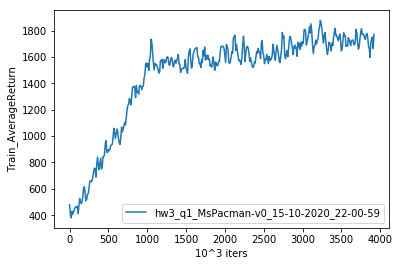

In [77]:
# Question 1. 

%matplotlib inline
import matplotlib.pyplot as plt
plt.clf()
import collections
exps = collections.OrderedDict(sorted(exps.items()))
for k, v in exps.items(): 
    if 'q1' in k and 'Ms' in k:
        print('kkkk', k)
        v = list(v)
        print(data_dir + 'submit/'+ v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        tsteps, returns = get_section_results_atari(data_dir  + v[0],
                                          avret='Train_AverageReturn')
    
        plt.plot(np.array(tsteps[:-1])/1e3, returns[:], label = v[0].split('_Inverted')[0])
        plt.xlabel('10^3 iters')
        plt.ylabel('Train_AverageReturn')
        plt.legend()
        plt.savefig('./q1')
    plt.show()



/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-37
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-37/events.out.tfevents.1602872977.mind4
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-37
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
mkdir: cannot create directory ‘/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/’: File exists
142.11575317382812
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-16
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-16/events.out.tfevents.1602872956.mind7
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285/homework_f

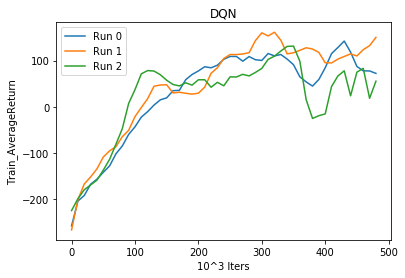

In [78]:
# Question 2. Part 1. DQN.

%matplotlib inline
import matplotlib.pyplot as plt
plt.clf()
import collections
exps = collections.OrderedDict(sorted(exps.items()))

exp_dirs = [
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-37',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-16',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_1_LunarLander-v3_16-10-2020_11-28-44',
#     'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_1_LunarLander-v3_16-10-2020_11-27-54'
]
for idx, v in enumerate(exp_dirs):
    v = v.split('/')[-1]
    print(data_dir + v)
    tsteps, returns = get_section_results_atari(data_dir + v,
                                      avret='Train_AverageReturn')

    print(np.max(returns))
    plt.plot(np.array(tsteps[:-1])/1e3, returns[:], label = 'Run %d' %idx)
    plt.title('DQN')
    plt.xlabel('10^3 Iters')
    plt.ylabel('Train_AverageReturn')
    plt.legend()
plt.savefig('./q2_part1')
plt.show()


/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48/events.out.tfevents.1602873108.mind8
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
mkdir: cannot create directory ‘/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/’: File exists
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-17
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-17/events.out.tfevents.1602873077.mind6
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285

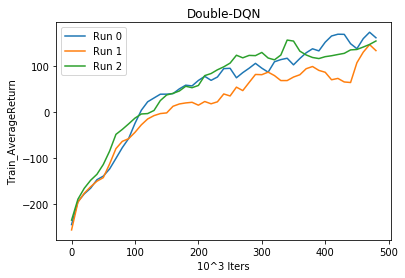

In [79]:
# Question 2. Part 1. DDQN.

%matplotlib inline
import matplotlib.pyplot as plt
plt.clf()
import collections
exps = collections.OrderedDict(sorted(exps.items()))

exp_dirs = [
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-17',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-30-49'
    
]
for idx, v in enumerate(exp_dirs):
    v = v.split('/')[-1]
    print(data_dir + v)
    tsteps, returns = get_section_results_atari(data_dir + v,
                                      avret='Train_AverageReturn')

    plt.plot(np.array(tsteps[:-1])/1e3, returns[:], label = 'Run %d' %idx)
    plt.title('Double-DQN')
    plt.xlabel('10^3 Iters')
    plt.ylabel('Train_AverageReturn')
    plt.legend()
plt.savefig('./q2_part1')
plt.show()


0
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48/events.out.tfevents.1602873108.mind8
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
mkdir: cannot create directory ‘/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/’: File exists
1
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-17
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-17/events.out.tfevents.1602873077.mind6
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/c

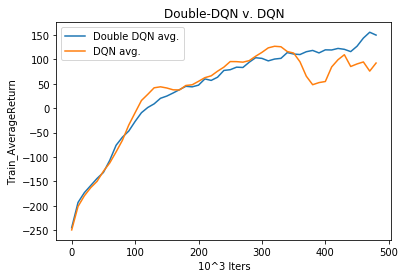

In [94]:
# Question 2. Part 1. DDQN.

%matplotlib inline
import matplotlib.pyplot as plt
plt.clf()
import collections
exps = collections.OrderedDict(sorted(exps.items()))

exp_dirs = [
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-17',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-30-49',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-37',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-16',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_1_LunarLander-v3_16-10-2020_11-28-44',
]

returns_double, returns_normal = [], []
for idx, v in enumerate(exp_dirs):
    print(idx)
    v = v.split('/')[-1]
    print(data_dir + v)
    tsteps, returns = get_section_results_atari(data_dir + v,
                                      avret='Train_AverageReturn')
    if idx<3: 
        returns_double.append(returns)
    else:
        returns_normal.append(returns)
        
    
plt.plot(np.array(tsteps[:-1])/1e3, np.mean(np.array(returns_double), axis=0),label = 'Double DQN avg.')
plt.plot(np.array(tsteps[:-1])/1e3, np.mean(np.array(returns_normal), axis=0),label = 'DQN avg.')
plt.title('Double-DQN v. DQN')
plt.xlabel('10^3 Iters')
plt.ylabel('Train_AverageReturn')
plt.legend()
plt.savefig('./q2.png')
plt.show()


In [ ]:
# Question 2. Part 1. DDQN.

%matplotlib inline
import matplotlib.pyplot as plt
plt.clf()
import collections
exps = collections.OrderedDict(sorted(exps.items()))

exp_dirs = [
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-17',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-30-49',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-37',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_2_LunarLander-v3_16-10-2020_11-29-16',
    'cs285/homework_fall2020/hw3/cs285/data/hw3_q2_dqn_1_LunarLander-v3_16-10-2020_11-28-44',
]
for idx, v in enumerate(exp_dirs):
    print(idx)
    v = v.split('/')[-1]
    print(data_dir + v)
    tsteps, returns = get_section_results_atari(data_dir + v,
                                      avret='Train_AverageReturn')
    if idx < 3: 
        color = 'r'
        name = 'double DQN'
    else: 
        color = 'b'
        name = 'DQN'
    plt.plot(np.array(tsteps[:-1])/1e3, returns[:], c=color, label = '%s Seed %d' %(name, (idx%3)))
    plt.title('Double-DQN v. DQN')
    plt.xlabel('10^3 Iters')
    plt.ylabel('Train_AverageReturn')
    plt.legend()
plt.savefig('./q2.png')
plt.show()


kkkk hw3_q3_hparam1_LunarLander
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q3_hparam1_LunarLander-v3_19-10-2020_13-42-43
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q3_hparam1_LunarLander-v3_19-10-2020_13-42-43/events.out.tfevents.1603140163.mind7
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q3_hparam1_LunarLander-v3_19-10-2020_13-42-43
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
mkdir: cannot create directory ‘/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/’: File exists
1
kkkk hw3_q3_hparam2_LunarLander
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q3_hparam2_LunarLander-v3_19-10-2020_13-43-14
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q3_hparam2_LunarLander-v3_19-10-2020_13-43-14/events.out.tfevents.1603140194.mind4
fp final /userdata/smetzger/cs285/homework_fall2020

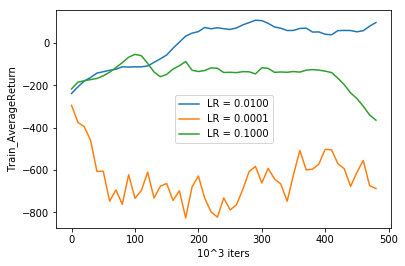

In [81]:
# Question 3. 

# LR dict
lr_dict = {'1': 1e-3, 
            '2':1e-2,
            '3': 1e-4, 
            '4':1e-1}

for k, v in exps.items(): 
    if 'q3' in k and 'hparam' in k:
        print('kkkk', k)
        v = list(v)
        print(data_dir +  v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        tsteps, returns = get_section_results_atari(data_dir + v[0],
                                          avret='Train_AverageReturn')
    
        hparam_num = v[0].split('hparam')[1][0]
        print(hparam_num)
        name = 'LR = %.4f' %lr_dict[hparam_num]
        if not hparam_num == '1': 
            
            plt.plot(np.array(tsteps[:-1])/1e3, returns[:], label = name)
            plt.xlabel('10^3 iters')
            plt.ylabel('Train_AverageReturn')
            plt.legend()

plt.savefig('./q3')        
plt.show()

kkkk hw3_q4_100_1_CartPole
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q4_100_1_CartPole-v0_19-10-2020_12-09-32
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q4_100_1_CartPole-v0_19-10-2020_12-09-32/events.out.tfevents.1603134572.spirit
file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q4_100_1_CartPole-v0_19-10-2020_12-09-32
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q4_100_1_CartPole-v0_19-10-2020_12-09-32
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
kkkk hw3_q4_10_10_CartPole
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q4_10_10_CartPole-v0_19-10-2020_12-16-32
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q4_10_10_CartPole-v0_19-10-2020_12-16-32/events.out.tfevents.1603134992.spirit
file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q4_10_10_CartPole-v0_

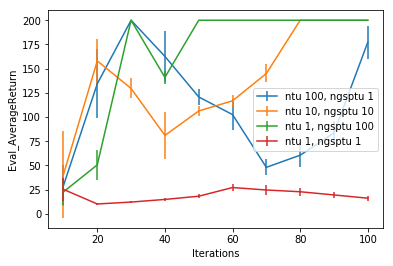

In [95]:
# Question 4: 

for k, v in exps.items(): 
    if 'q4' in k:
        print('kkkk', k)
        v = list(v)
        print(data_dir +  v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        returns, std_returns = get_section_results(data_dir + v[0])
    
        txt = v[0].split('_Cart')[0]
        txt.replace('ac', '')
        ngsptu = int(txt.split('_')[-1])
        ntu = int(txt.split('_')[-2])
        plt.errorbar((np.arange(len(returns))+1)*10, returns[:], yerr=std_returns, label = 'ntu %d, ngsptu %d'
                    %(ntu, ngsptu))
        plt.xlabel('Iterations')
        plt.ylabel('Eval_AverageReturn')
        plt.legend()

plt.savefig('./q4')        
plt.show()

In [83]:
# Question 5. Actor critic on the hard tasks

kkkk hw3_q5_1_100_InvertedPendulum
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q5_1_100_InvertedPendulum-v2_19-10-2020_12-23-43
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q5_1_100_InvertedPendulum-v2_19-10-2020_12-23-43/events.out.tfevents.1603135423.spirit
file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q5_1_100_InvertedPendulum-v2_19-10-2020_12-23-43
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q5_1_100_InvertedPendulum-v2_19-10-2020_12-23-43
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/


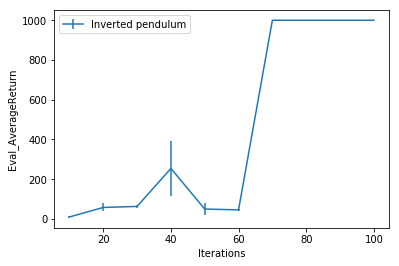

In [96]:
# Question 4: 

for k, v in exps.items(): 
    if 'q5' in k and 'Inv' in k:
        print('kkkk', k)
        v = list(v)
        print(data_dir +  v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        returns, std_returns = get_section_results(data_dir + v[0])
    
#         txt = v[0].split('_Cart')[0]
#         txt.replace('ac', '')
#         ngsptu = int(txt.split('_')[-1])
#         ntu = int(txt.split('_')[-2])
        plt.errorbar((np.arange(len(returns))+1)*10, returns[:], yerr=std_returns, label = 'Inverted pendulum')
        plt.xlabel('Iterations')
        plt.ylabel('Eval_AverageReturn')
        plt.legend()

plt.savefig('./q5_ipen')        
plt.show()

kkkk hw3_q5_1_100_HalfCheetah
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q5_1_100_HalfCheetah-v2_19-10-2020_12-28-29
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q5_1_100_HalfCheetah-v2_19-10-2020_12-28-29/events.out.tfevents.1603135709.mind4
file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q5_1_100_HalfCheetah-v2_19-10-2020_12-28-29
fp final /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q5_1_100_HalfCheetah-v2_19-10-2020_12-28-29
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/logs/


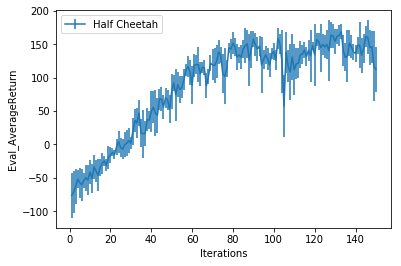

In [97]:
# Question 5 part 2

for k, v in exps.items(): 
    if 'q5' in k and 'Half' in k:
        print('kkkk', k)
        v = list(v)
        print(data_dir +  v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        returns, std_returns = get_section_results(data_dir + v[0])
        plt.errorbar((np.arange(len(returns))+1), returns[:], yerr=std_returns, label = 'Half Cheetah')
        plt.xlabel('Iterations')
        plt.ylabel('Eval_AverageReturn')
        plt.legend()

plt.savefig('./q5_halfcheetah')        
plt.show()

In [93]:
for file in os.listdir('./cs285/data/logs'): 
    for ff in os.listdir(os.path.join('./cs285/data/logs', file)): 
        print(ff)
        if 'gym' in ff: 
            clean = os.path.join('./cs285/data/logs', file)
            clean = os.path.join(clean, 'gym')
            !rm -r $clean

events.out.tfevents.1602873077.mind6
events.out.tfevents.1603135709.mind4
events.out.tfevents.1603140163.mind7
events.out.tfevents.1603134334.spirit
events.out.tfevents.1602873108.mind8
events.out.tfevents.1603134572.spirit
events.out.tfevents.1602824459.mind5
events.out.tfevents.1603140209.mind1
events.out.tfevents.1603135423.spirit
events.out.tfevents.1603140209.mind6
events.out.tfevents.1603134992.spirit
events.out.tfevents.1602872924.mind5
events.out.tfevents.1603140194.mind4
events.out.tfevents.1602873049.mind1
events.out.tfevents.1603134804.spirit
events.out.tfevents.1602872956.mind7
events.out.tfevents.1602872977.mind4
